# ANN for classifying qwerties
This document will cover:
- What a 'qwerty' is (Hint: its a meaningless name)
- How to construct anANN model for binary classification
- Why its dangerous to assume that ANNs always work

In [120]:
# import libraries
import numpy as  np
import torch as t
import torch.nn as tnn
import matplotlib.pyplot as plt

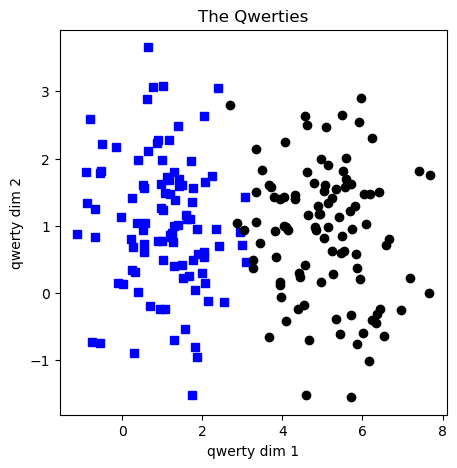

In [121]:
# Create data

nPerClust = 100
blur = 1

A = [1, 1]
B = [5, 1]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]

# True labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

# Concatenate into a matrix
data_np = np.hstack((a,b)).T

# Convert to a pytorch tensor
data = t.tensor(data_np).float()
labels = t.tensor(labels_np).float()

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0], 0], data[np.where(labels==0)[0], 1], 'bs')
plt.plot(data[np.where(labels==1)[0], 0], data[np.where(labels==1)[0], 1], 'ko')
plt.title('The Qwerties')
plt.xlabel('qwerty dim 1')
plt.ylabel('qwerty dim 2')
plt.show()

In [122]:
# Build the ANN
ANN = tnn.Sequential(
    tnn.Linear(2,1),     # input layer
    tnn.ReLU(),          # activation function
    tnn.Linear(1,1),     # output layer
    tnn.Sigmoid()        # output layer activation function
)

In [123]:
# other model features

# Learning Rate
learningRate = .01

# Loss function
lossfunc = tnn.BCELoss()
# Vidnote: You'll learn in the "Metaparameters" section that its better to use BCEWithLogitsLoss, but this is okay for now.

# optimizer
optimizer = t.optim.SGD(ANN.parameters(), lr=learningRate)

In [124]:
# train model
numepochs = 2500
losses = t.zeros(numepochs)

for epochi in range(numepochs):
    # forward pass
    yHat = ANN(data)
    
    # compute loss\
    loss = lossfunc(yHat, labels)
    losses[epochi] = loss

    #backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

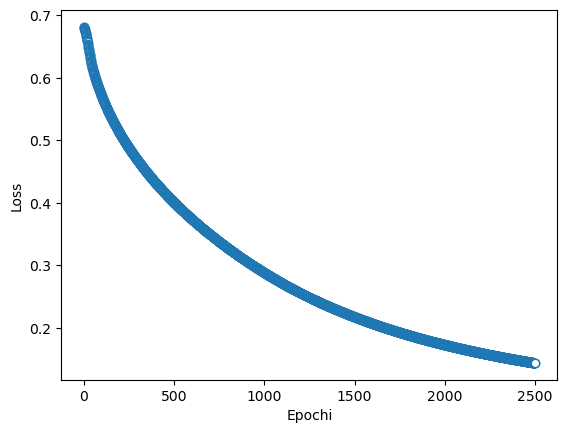

In [125]:
# show losses
plt.plot(losses.detach(), 'o',markerfacecolor='w', linewidth=.1)
plt.xlabel('Epochi')
plt.ylabel('Loss')
plt.show()

In [126]:
# compute the predictions

# manually compute loss
# final forward pass
predictions = ANN(data)
predlabels = predictions>.5

#find errors
misclass = np.where(predlabels != labels)[0]

# total accuracy
totacc = 100-100*len(misclass)/(2*nPerClust)

print('Final Accuracy: %g%%' %totacc)

Final Accuracy: 97%


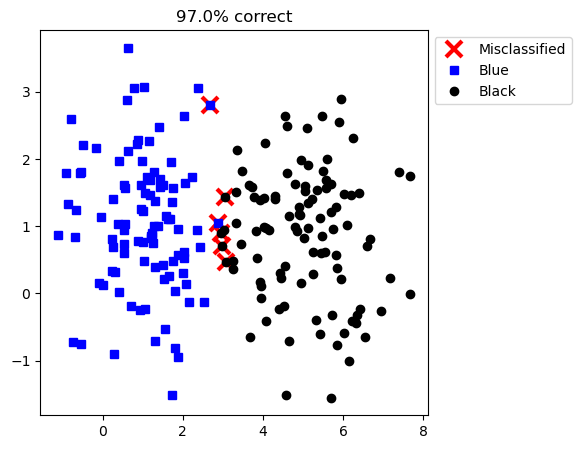

In [127]:
# plot
fig = plt.figure(figsize=(5,5))
plt.plot(data[misclass, 0], data[misclass, 1], 'rx', markersize=12,markeredgewidth=3)
plt.plot(data[np.where(~predlabels)[0],0], data[np.where(~predlabels)[0],1], 'bs',)
plt.plot(data[np.where(predlabels)[0],0], data[np.where(predlabels)[0],1], 'ko',)

plt.legend(['Misclassified', 'Blue', 'Black'], bbox_to_anchor=(1,1))
plt.title(f'{totacc}% correct')
plt.show()